In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T_eff= 1000 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run = jdi.inputs(calculation="brown", climate = True) # start a calculation 

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.T_eff(Teff=T_eff) # input effective temperature



T_star = "NA" # K, As it is a isolated brown dwarf, these params are not needed so 'NA'
semi_major = "NA" # AU,  As it is a isolated brown dwarf, these params are not needed so 'NA'
# ignore this for now
self_consistent_kzz= False # Only needed if you want to do on-the-fly calculation with MLT Kzz



In [3]:
mh = '+0.0' #log metallicity
CtoO = '1.0' # CtoO ratio


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
#ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/m'+mh+'_co'+CtoO+'.data.196'
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db) # grab your opacities


In [4]:

print(opacity_ck.full_abunds['pressure'])
print(opacity_ck.full_abunds['temperature'])

print(len(np.unique(opacity_ck.full_abunds['temperature'])))
print(len(np.unique(opacity_ck.full_abunds['pressure'])))


abundance_arr_h2o = np.zeros(shape=(len(np.unique(opacity_ck.full_abunds['pressure'])),len(np.unique(opacity_ck.full_abunds['temperature']))))
abundance_arr_ch4 = np.zeros(shape=(len(np.unique(opacity_ck.full_abunds['pressure'])),len(np.unique(opacity_ck.full_abunds['temperature']))))
abundance_arr_co = np.zeros(shape=(len(np.unique(opacity_ck.full_abunds['pressure'])),len(np.unique(opacity_ck.full_abunds['temperature']))))
abundance_arr_nh3 = np.zeros(shape=(len(np.unique(opacity_ck.full_abunds['pressure'])),len(np.unique(opacity_ck.full_abunds['temperature']))))





0          0.000001
1          0.000003
2          0.000010
3          0.000030
4          0.000100
           ...     
1455      30.000000
1456     100.000000
1457     300.000000
1458    1000.000000
1459    3000.000000
Name: pressure, Length: 1460, dtype: float64
0         75.0
1         75.0
2         75.0
3         75.0
4         75.0
         ...  
1455    4000.0
1456    4000.0
1457    4000.0
1458    4000.0
1459    4000.0
Name: temperature, Length: 1460, dtype: float64
73
20


In [5]:
ct = 0
for i in range(len(np.unique(opacity_ck.full_abunds['temperature']))):
    for j in range(len(np.unique(opacity_ck.full_abunds['pressure']))):
        if ct < 1460:
            abundance_arr_ch4[j,i] = opacity_ck.full_abunds['CH4'][ct]
            abundance_arr_h2o[j,i] = opacity_ck.full_abunds['H2O'][ct]
            abundance_arr_co[j,i] = opacity_ck.full_abunds['CO'][ct]
            abundance_arr_nh3[j,i] = opacity_ck.full_abunds['NH3'][ct]
            ct+=1
        
        

In [6]:
print(opacity_ck.gauss_pts)
print(opacity_ck.gauss_wts)

[0.06596025199282482, 0.313509004297193, 0.636490995702807, 0.884039748007175, 0.953471592210149, 0.966500473910379, 0.983499526089621, 0.996528407789851]
[0.165231051440291, 0.309768948559709, 0.309768948559709, 0.165231051440291, 0.008696371128436358, 0.01630362887156367, 0.01630362887156367, 0.008696371128436358]


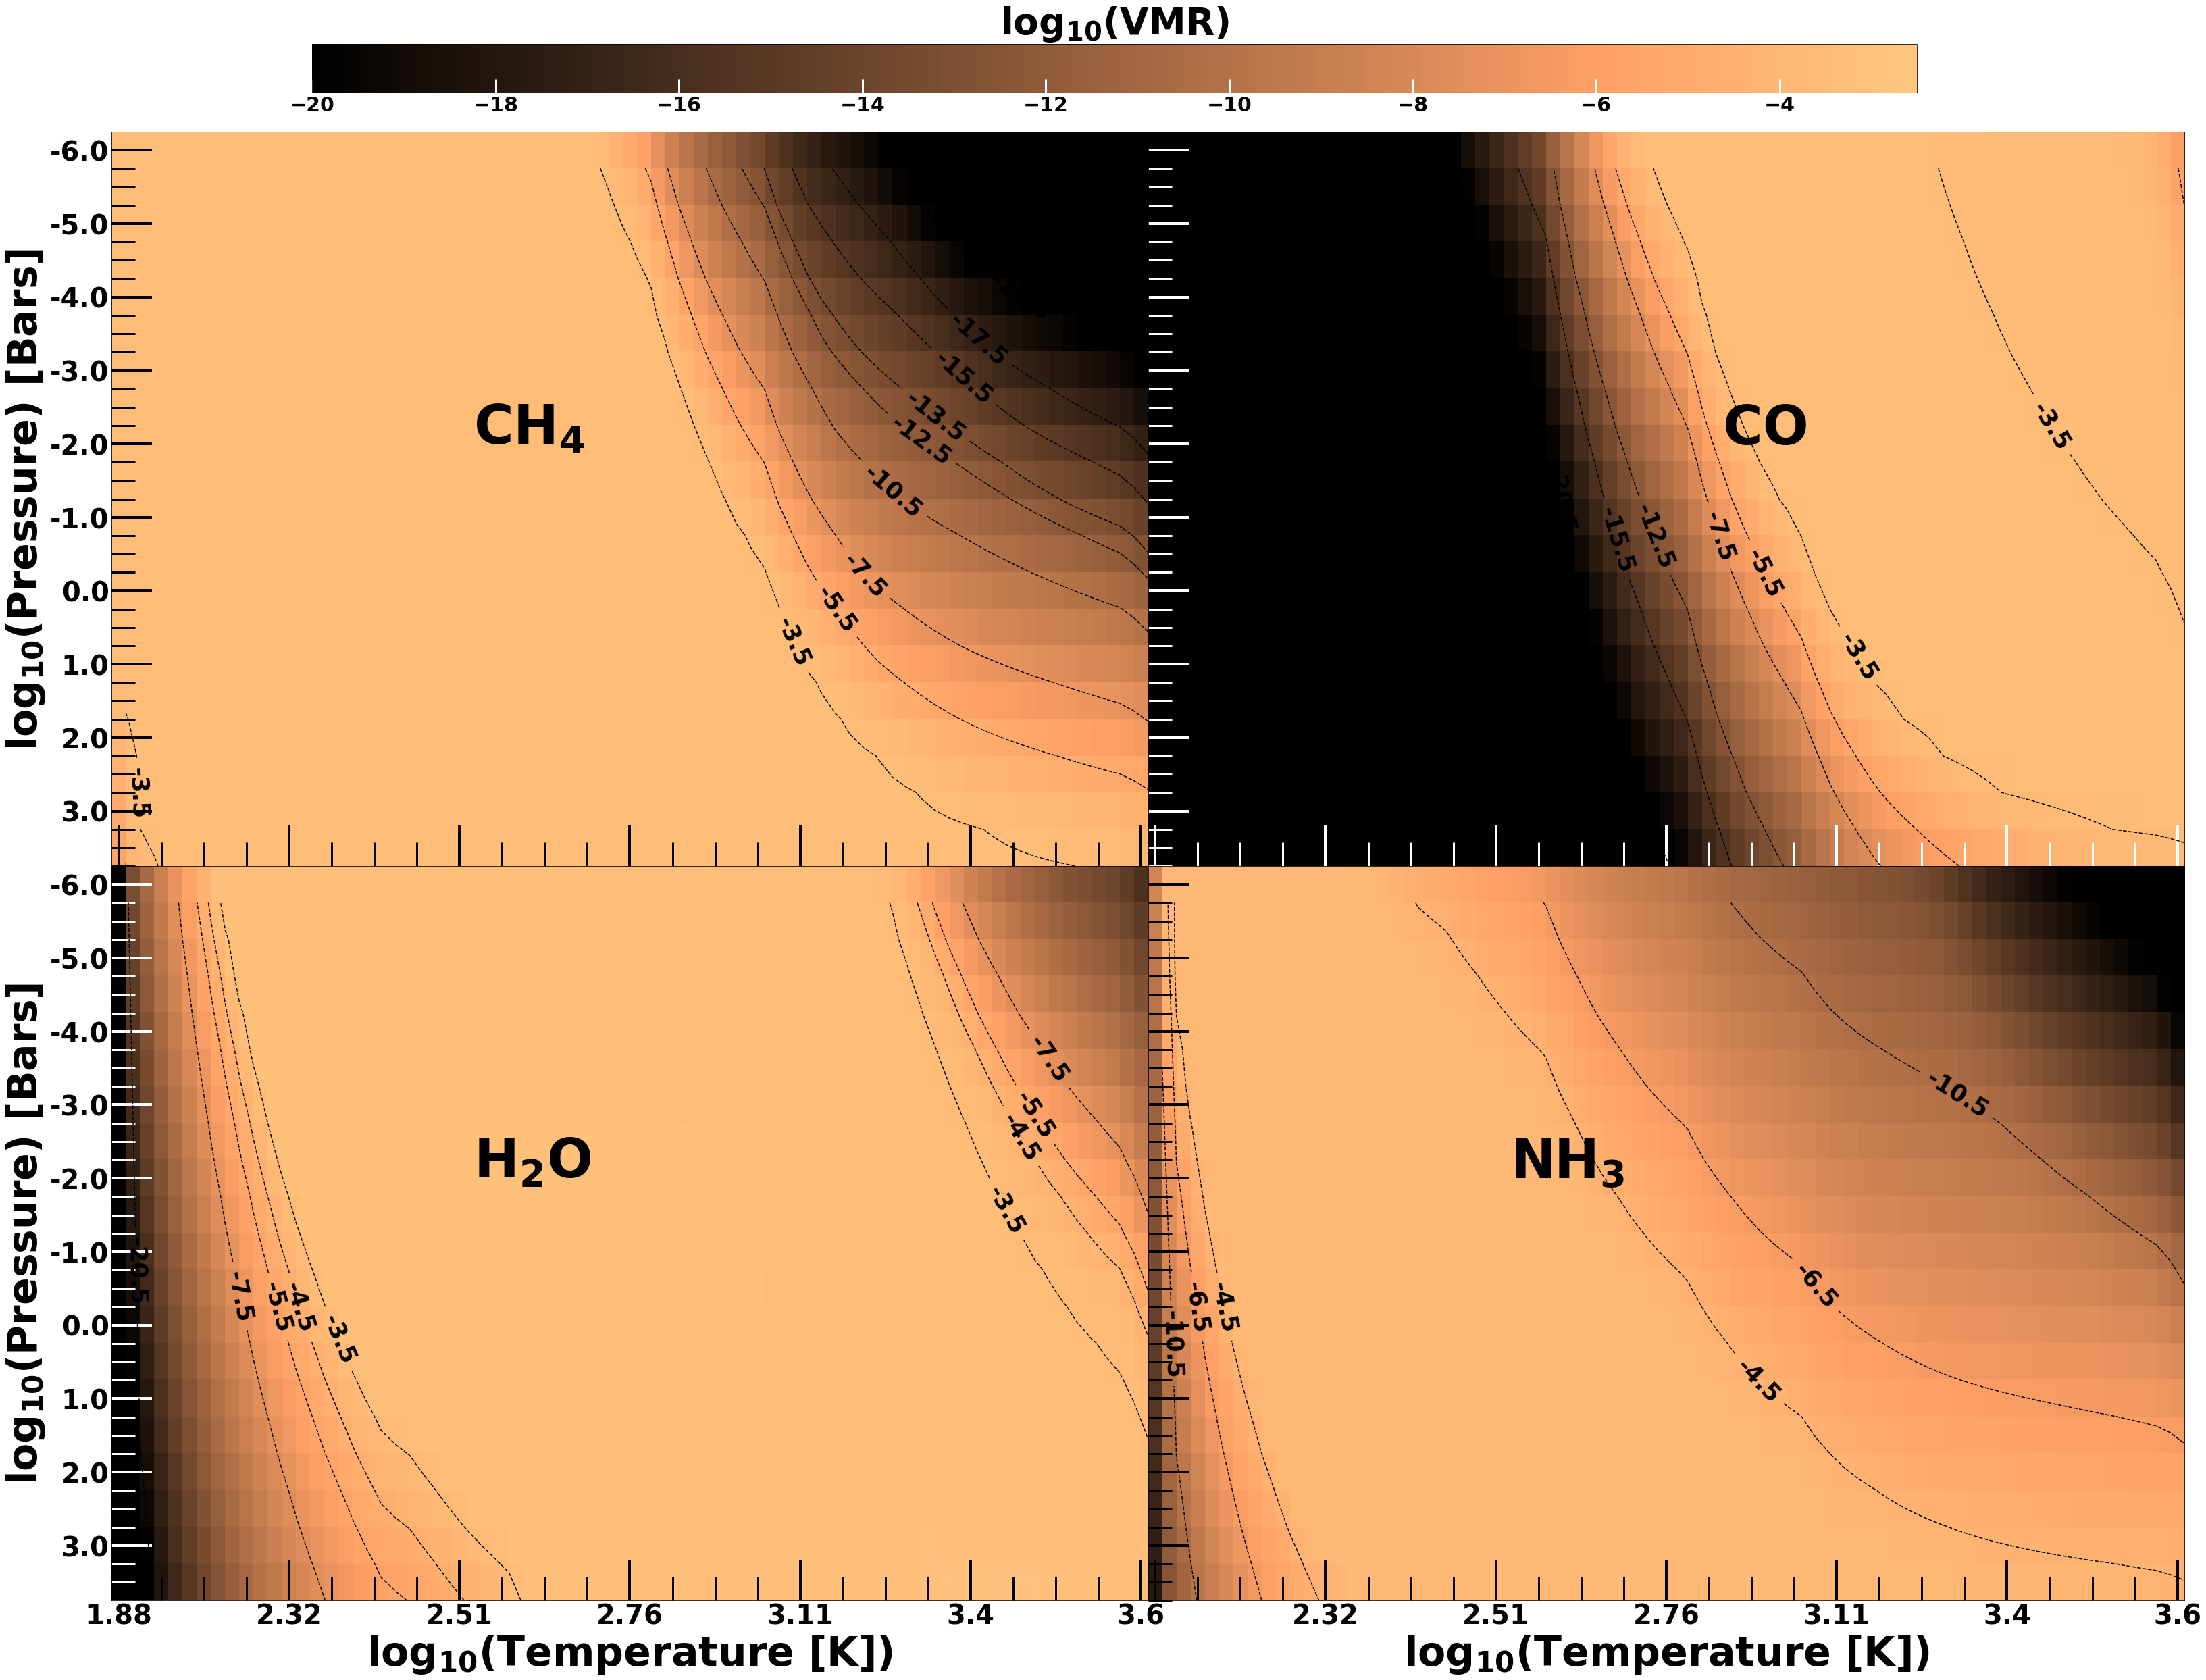

In [25]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(55,40))


im1=ax[0,0].imshow(np.log10(abundance_arr_ch4),aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[0,0].set_yticks(ticks=x_positions)

ax[0,0].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[0,0].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax[0,0].set_xticklabels(y_labels)
levels = [-23.5,-20.5,-17.5,-15.5,-13.5,-12.5,-10.5,-7.5,-5.5,-3.5]
cs = ax[0,0].contour(np.log10(abundance_arr_ch4), levels=levels ,origin='lower', colors=['k'])

ax[0,0].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[0,0].minorticks_on()
ax[0,0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0,0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
#cbar=plt.colorbar(im,ax=ax[0,0])

#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
        
im=ax[0,1].imshow(np.log10(abundance_arr_co),aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[0,1].set_yticks(ticks=x_positions)

ax[0,1].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[0,1].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"


ax[0,1].set_xticklabels([])
#ax[0,1].set_xticklabels(y_labels)
levels = [-20.5,-15.5,-12.5,-7.5,-5.5,-3.5]
cs = ax[0,1].contour(np.log10(abundance_arr_co), levels=levels ,origin='lower', colors=['k'])

ax[0,1].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[0,1].minorticks_on()
ax[0,1].tick_params(axis='x',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[0,1].tick_params(axis='x',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)
ax[0,1].tick_params(axis='y',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[0,1].tick_params(axis='y',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)
#cbar=plt.colorbar(im,ax=ax[0,1])

#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
        
        
        
im=ax[1,0].imshow(np.log10(abundance_arr_h2o),aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[1,0].set_yticks(ticks=x_positions)

ax[1,0].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[1,0].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax[1,0].set_xticklabels(y_labels)
levels = [-20.5,-7.5,-5.5,-4.5,-3.5,-2.5]
cs = ax[1,0].contour(np.log10(abundance_arr_h2o), levels=levels ,origin='lower', colors=['k'])

ax[1,0].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[1,0].minorticks_on()

ax[1,0].tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[1,0].tick_params(axis='y',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='y',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)

#cbar=plt.colorbar(im,ax=ax[1,0])

#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
        
       
        
        
im=ax[1,1].imshow(np.log10(abundance_arr_nh3),aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[1,1].set_yticks(ticks=x_positions)

ax[1,1].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[1,1].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax[1,1].set_xticklabels([None,2.32,2.51,2.76,3.11,3.4,3.6])
levels = [-10.5,-6.5,-4.5,-2.5]
cs = ax[1,1].contour(np.log10(abundance_arr_nh3), levels=levels ,origin='lower', colors=['k'])

ax[1,1].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[1,1].minorticks_on()
ax[1,1].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,1].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
#cbar=fig.colorbar(im)
#cbar.set_label(r'log$_10$(NH$_3$)',fontsize=50, rotation=270)
#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[0,0].set_xticklabels([])
fig.subplots_adjust(wspace=0,hspace=0)

cbar_ax = fig.add_axes([0.2, 0.9, 0.6, 0.025])
fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r"log$_{10}$(VMR)",fontsize=55,labelpad=15)
#ax['E'].xaxis.set_label_position('top') 
cbar_ax.tick_params(axis='both',which='major',color="white",length =20, width=3,direction='in',labelsize=30)
cbar_ax.xaxis.set_label_position('top')

ax[0,0].set_ylabel("log$_{10}$(Pressure) [Bars]",fontsize=60)
ax[1,0].set_ylabel("log$_{10}$(Pressure) [Bars]",fontsize=60)

ax[1,0].set_xlabel("log$_{10}$(Temperature [K])",fontsize=60)
ax[1,1].set_xlabel("log$_{10}$(Temperature [K])",fontsize=60)

ax[0,0].annotate("CH$_4$",(25,8),fontsize=80)
ax[0,1].annotate("CO",(40,8),fontsize=80)
ax[1,0].annotate("H$_2$O",(25,8),fontsize=80)
ax[1,1].annotate("NH$_3$",(25,8),fontsize=80)

#cbar.set_label(r'log$_10$(NH$_3$)',fontsize=50, rotation=270)
#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
plt.savefig("Benchmarking/1460_abundance_grid.pdf",bbox_inches="tight")

In [7]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



In [8]:
T_son = np.array(['300','500','700','900','1100','1300','1700','2300'])

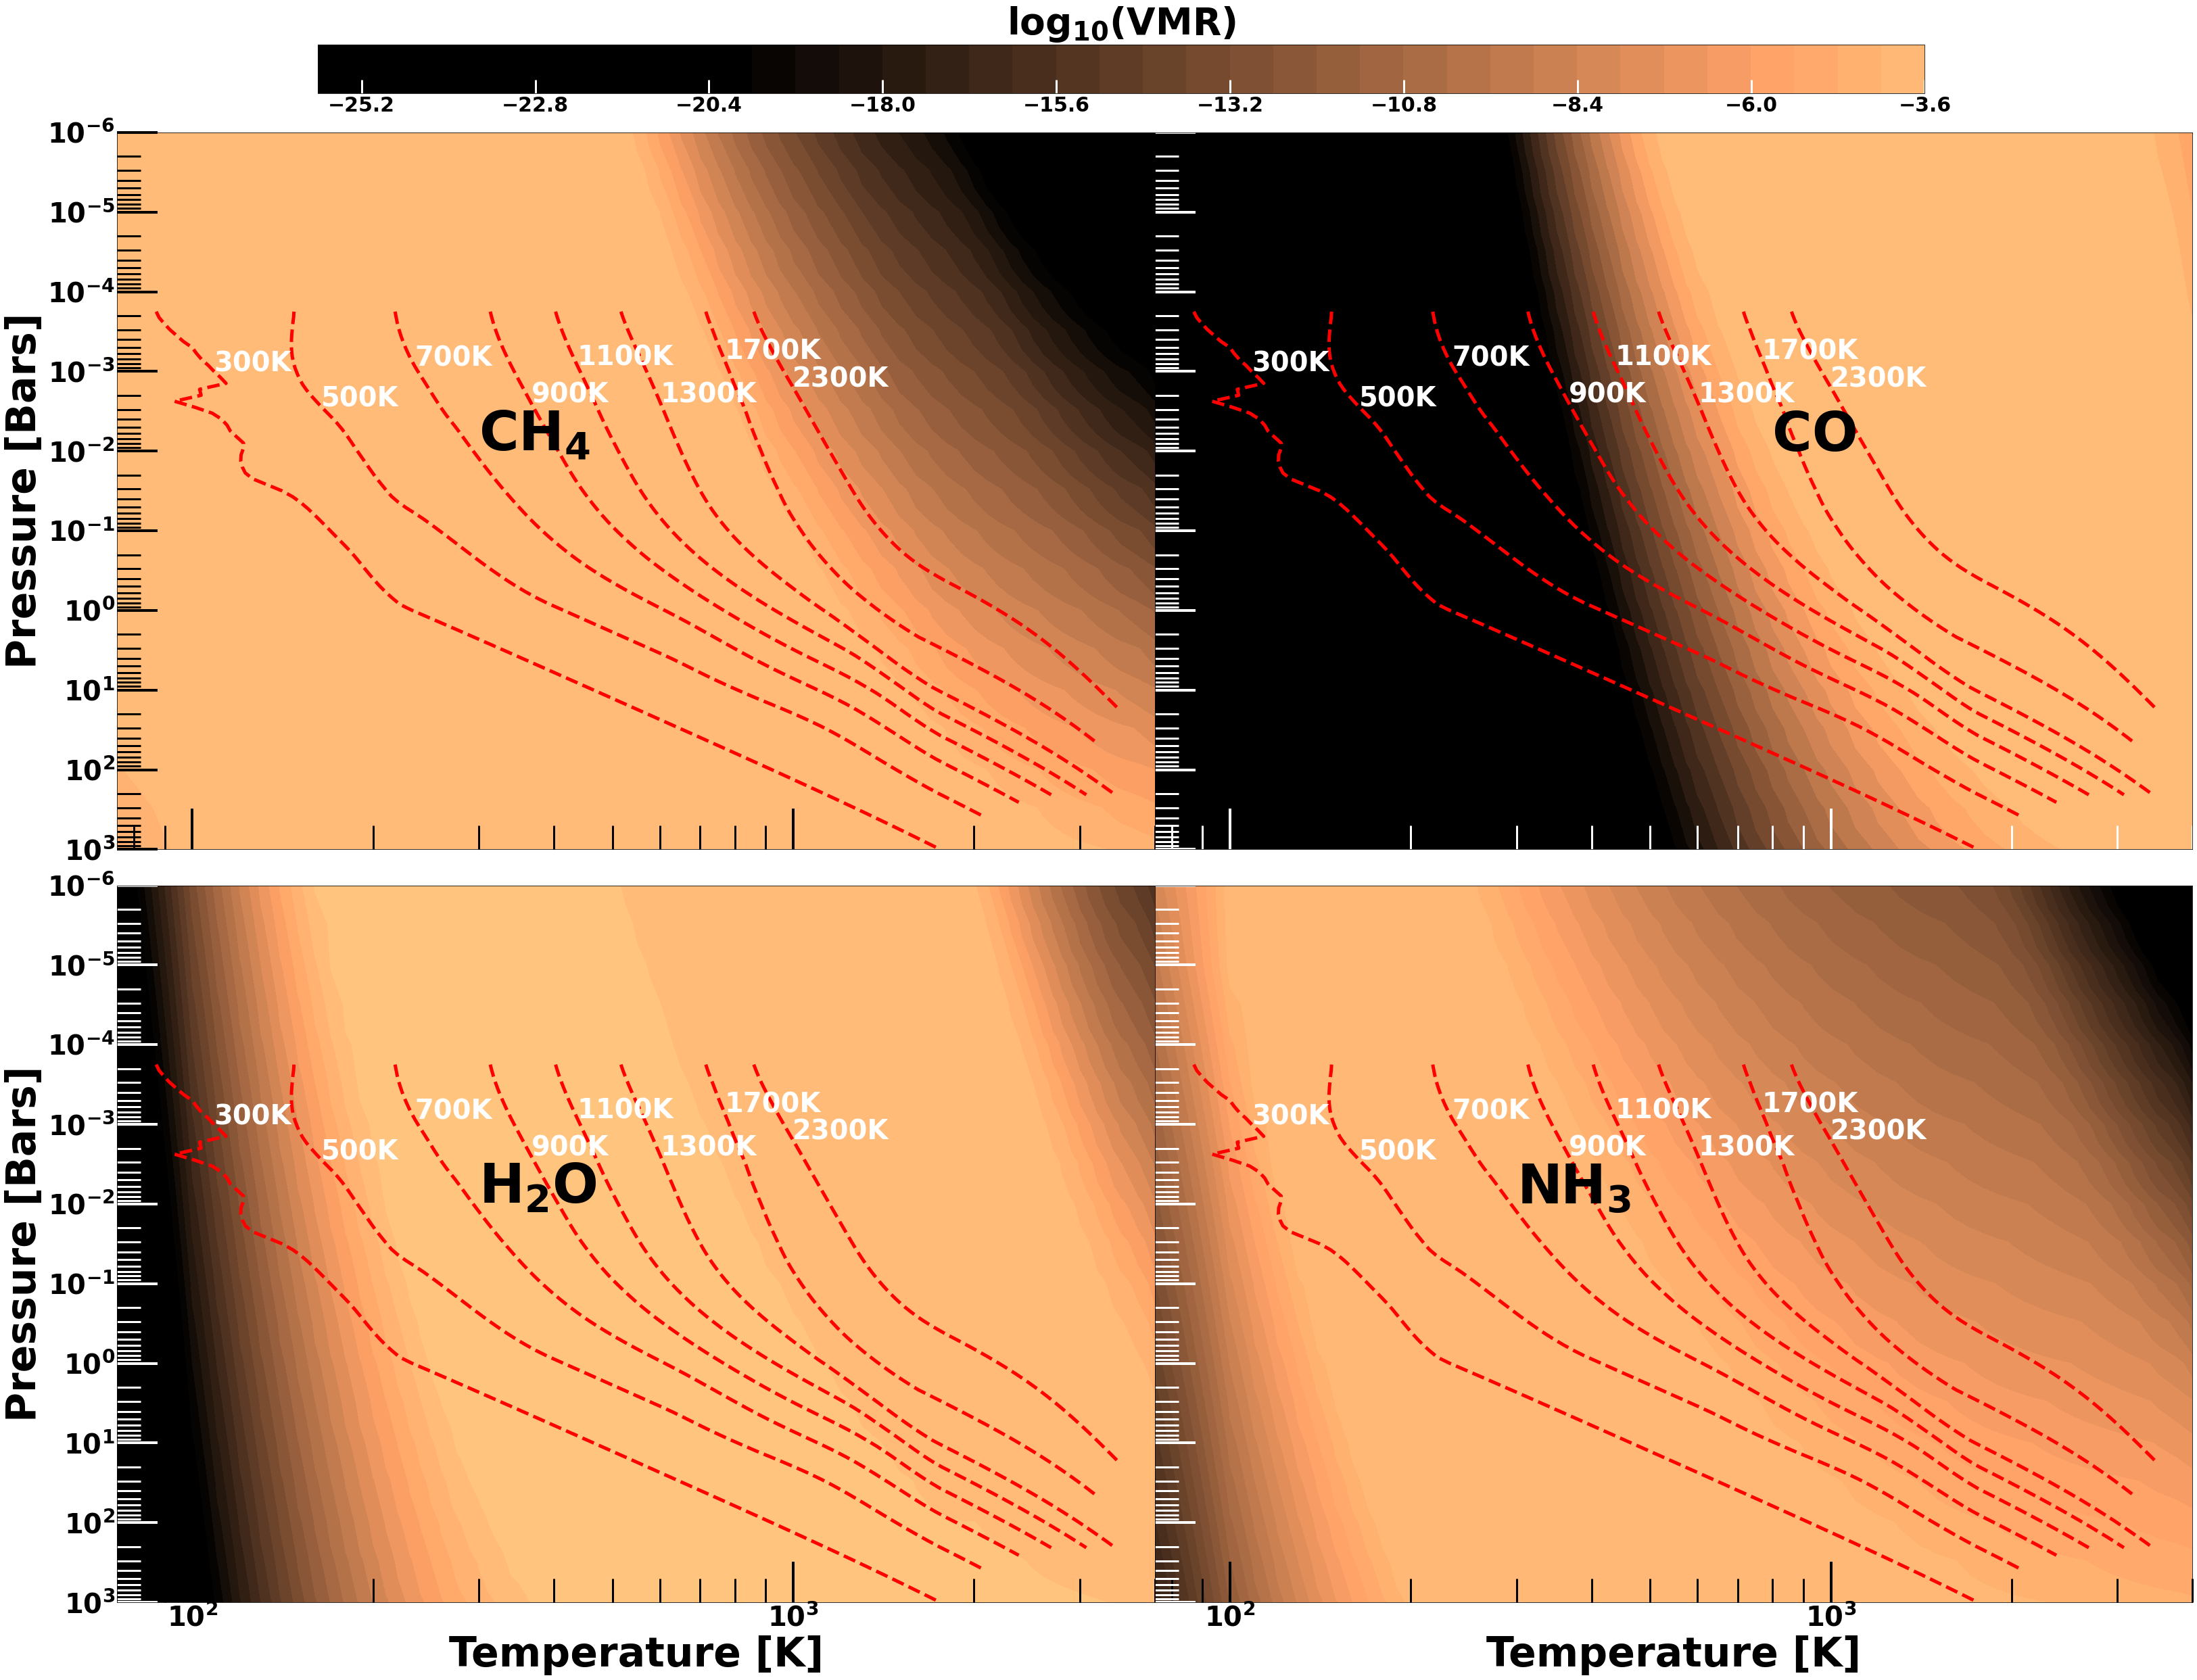

In [27]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(55,40))


im1=ax[0,0].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(abundance_arr_ch4),40,aspect='auto',cmap='copper',vmin=-20,vmax=-2.5,linewidths=30,linestyles='solid')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

ax[0,0].set_ylim(1e3,1e-6)
ax[0,0].minorticks_on()
ax[0,0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0,0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)

ax[0,0].set_xticklabels([])

im1=ax[0,1].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(abundance_arr_co),40,aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[0,1].set_ylim(1e3,1e-6)
ax[0,1].minorticks_on()
ax[0,1].tick_params(axis='both',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[0,1].tick_params(axis='both',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)

ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])


im1=ax[1,0].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(abundance_arr_h2o),40,aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,0].set_ylim(1e3,1e-6)
ax[1,0].minorticks_on()
ax[1,0].tick_params(axis='y',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='y',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)
ax[1,0].tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)


#ax[1,0].set_xticklabels([])
#ax[1,0].set_yticklabels([])

im1=ax[1,1].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(abundance_arr_nh3),40,aspect='auto',cmap='copper',vmin=-20,vmax=-2.5)
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

ax[1,1].set_ylim(1e3,1e-6)
ax[1,1].minorticks_on()
ax[1,1].tick_params(axis='y',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[1,1].tick_params(axis='y',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)
ax[1,1].tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,1].tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)


#ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])


ax[0,0].set_ylabel("Pressure [Bars]",fontsize=60)
ax[1,0].set_ylabel("Pressure [Bars]",fontsize=60)

ax[1,0].set_xlabel("Temperature [K]",fontsize=60)
ax[1,1].set_xlabel("Temperature [K]",fontsize=60)

ax[0,0].annotate("CH$_4$",(300,1e-2),fontsize=80)
ax[0,1].annotate("CO",(800,1e-2),fontsize=80)
ax[1,0].annotate("H$_2$O",(300,1e-2),fontsize=80)
ax[1,1].annotate("NH$_3$",(300,1e-2),fontsize=80)

ict = 10
for itemp in range(len(T_son)):
    pson,tson = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+T_son[itemp]+"g1000nc_m0.0.dat",usecols=[1,2],unpack=True,skiprows=1)
    ax[0,0].plot(tson,pson,linewidth=5,linestyle="--",color="r")
    ax[0,1].plot(tson,pson,linewidth=5,linestyle="--",color="r")
    ax[1,0].plot(tson,pson,linewidth=5,linestyle="--",color="r")
    ax[1,1].plot(tson,pson,linewidth=5,linestyle="--",color="r")
    '''
    if itemp == 5:
        ax[0,0].annotate(T_son[itemp]+"K",(tson[30],pson[30]),fontsize=40,color="w")
        ax[0,1].annotate(T_son[itemp]+"K",(tson[30],pson[30]),fontsize=40,color="w")
        ax[1,0].annotate(T_son[itemp]+"K",(tson[30],pson[30]),fontsize=40,color="w")
        ax[1,1].annotate(T_son[itemp]+"K",(tson[30],pson[30]),fontsize=40,color="w")
    elif itemp == 3:
        ax[0,0].annotate(T_son[itemp]+"K",(tson[0],pson[0]),fontsize=40,color="w")
        ax[0,1].annotate(T_son[itemp]+"K",(tson[0],pson[0]),fontsize=40,color="w")
        ax[1,0].annotate(T_son[itemp]+"K",(tson[0],pson[0]),fontsize=40,color="w")
        ax[1,1].annotate(T_son[itemp]+"K",(tson[0],pson[0]),fontsize=40,color="w")
    elif itemp == 4:
        ax[0,0].annotate(T_son[itemp]+"K",(tson[6],pson[6]),fontsize=40,color="w")
        ax[0,1].annotate(T_son[itemp]+"K",(tson[6],pson[6]),fontsize=40,color="w")
        ax[1,0].annotate(T_son[itemp]+"K",(tson[6],pson[6]),fontsize=40,color="w")
        ax[1,1].annotate(T_son[itemp]+"K",(tson[6],pson[6]),fontsize=40,color="w")
    elif itemp == 6:
        ax[0,0].annotate(T_son[itemp]+"K",(tson[55],pson[55]),fontsize=40,color="w")
        ax[0,1].annotate(T_son[itemp]+"K",(tson[55],pson[55]),fontsize=40,color="w")
        ax[1,0].annotate(T_son[itemp]+"K",(tson[55],pson[55]),fontsize=40,color="w")
        ax[1,1].annotate(T_son[itemp]+"K",(tson[55],pson[55]),fontsize=40,color="w")
    else:
        ax[0,0].annotate(T_son[itemp]+"K",(tson[35],pson[35]),fontsize=40,color="w")
        ax[0,1].annotate(T_son[itemp]+"K",(tson[35],pson[35]),fontsize=40,color="w")
        ax[1,0].annotate(T_son[itemp]+"K",(tson[35],pson[35]),fontsize=40,color="w")
        ax[1,1].annotate(T_son[itemp]+"K",(tson[35],pson[35]),fontsize=40,color="w")
    '''
    ax[0,0].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    ax[0,1].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    ax[1,0].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    ax[1,1].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    
    if itemp%2 == 0:
        ict+=7
    else:
        ict-=7
    

cbar_ax = fig.add_axes([0.2, 0.9, 0.6, 0.025])
fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r"log$_{10}$(VMR)",fontsize=55,labelpad=15)
#ax['E'].xaxis.set_label_position('top') 
cbar_ax.tick_params(axis='both',which='major',color="white",length =20, width=3,direction='in',labelsize=30)
cbar_ax.xaxis.set_label_position('top')

fig.subplots_adjust(wspace=0,hspace=0.05)

plt.savefig("Benchmarking/1460_abundance_grid_new.pdf",bbox_inches="tight")


(20, 73, 196, 8)


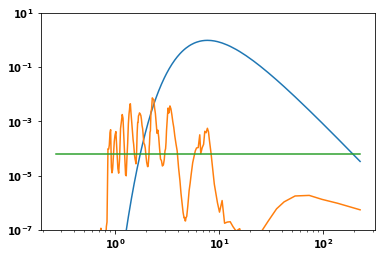

In [28]:
print(np.shape(opacity_ck.kappa))

ct = 0
for i in range(len(np.unique(opacity_ck.full_abunds['temperature']))):
    for j in range(len(np.unique(opacity_ck.full_abunds['pressure']))):
        if ct < 1060:
            
            #print(j,i,np.unique(opacity_ck.full_abunds['temperature'])[i])
            #abundance_arr_ch4[j,i] = opacity_ck.full_abunds['CH4'][ct]
            #abundance_arr_h2o[j,i] = opacity_ck.full_abunds['H2O'][ct]
            #abundance_arr_co[j,i] = opacity_ck.full_abunds['CO'][ct]
            #abundance_arr_nh3[j,i] = opacity_ck.full_abunds['NH3'][ct]
            ct+=1
        else:
            break

def b_lambda(T,wv):
    wv = wv*1e-4 # micron to cm
    c1 = 3.74e-16 *100 # W m-2 *1000 =erg/s/cm^2
    c2 = 1.44e-2*100 #m K *100 to cm/K
    return (c1*(wv**(-5)))/(np.exp(c2/(wv*T))-1) # cgs
    


def planck_mean_cs(opacity,T,wno,delta_wno):
    lam = 1e4/wno # micron
    dlam = (1e4/wno**2)*delta_wno # micron
    
    blambda = b_lambda(T,lam)
    
    denom = np.sum(blambda*dlam)
    #print((denom/(5.67037e-5*T**4)))
    numer = np.sum(opacity*blambda*dlam)
    
    return (numer/denom)

aa = planck_mean_cs(np.exp(opacity_ck.kappa[3,28,:,0])*6.02214086e+23,375,opacity_ck.wno,opacity_ck.delta_wno)

lam =1e4/opacity_ck.wno
plt.ylim(1e-7,10)
plt.loglog(lam,b_lambda(375,lam))
plt.loglog(lam,np.exp(opacity_ck.kappa[3,28,:,0])*6.02214086e+23)
plt.plot(lam,lam*0+aa)   

In [29]:
cs_array = np.zeros(shape=(len(np.unique(opacity_ck.full_abunds['pressure'])),len(np.unique(opacity_ck.full_abunds['temperature'])),8))
ct = 0
for i in range(len(np.unique(opacity_ck.full_abunds['temperature']))):
    for j in range(len(np.unique(opacity_ck.full_abunds['pressure']))):
        if ct < 1460:
            
            for igauss in range(8):
                cs_array[j,i,igauss] = planck_mean_cs(np.exp(opacity_ck.kappa[j,i,:,igauss])*6.02214086e+23,np.unique(opacity_ck.full_abunds['temperature'])[i],opacity_ck.wno,opacity_ck.delta_wno)
            
            ct+=1
        else:
            break

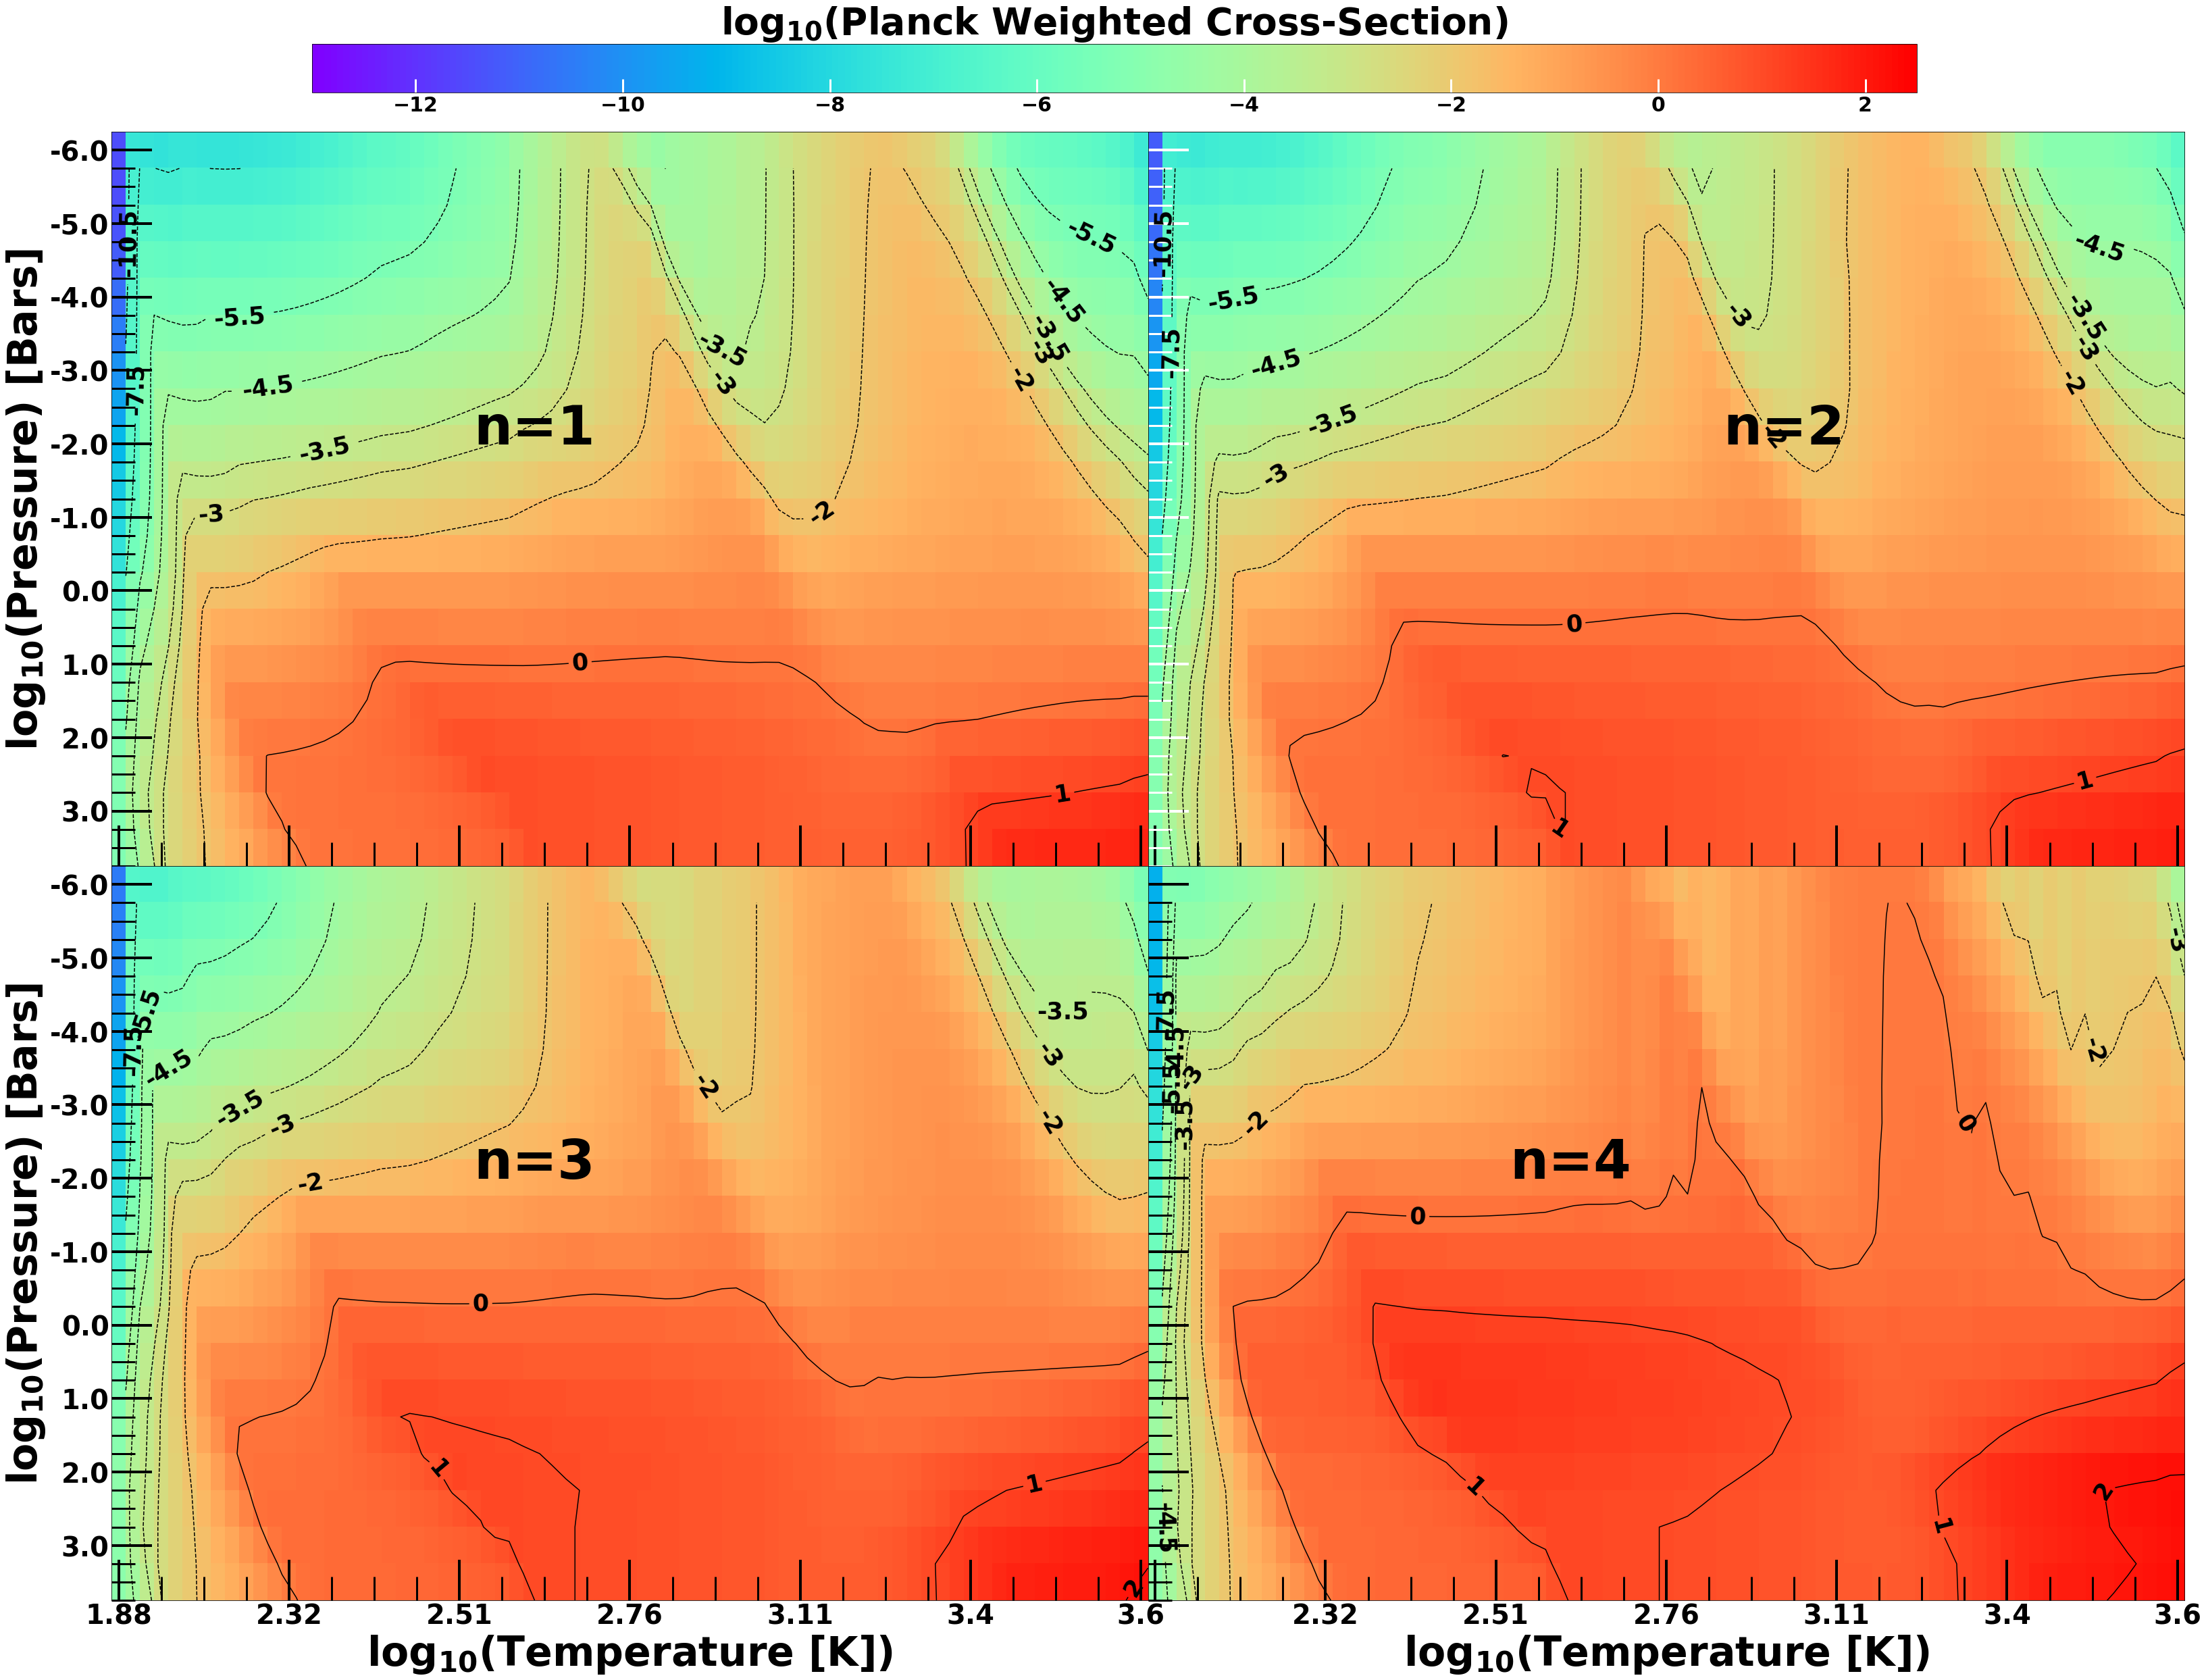

In [30]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(55,40))


im1=ax[0,0].imshow(np.log10(cs_array[:,:,0]),aspect='auto',cmap='rainbow',vmin=-13,vmax=2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[0,0].set_yticks(ticks=x_positions)

ax[0,0].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[0,0].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax[0,0].set_xticklabels(y_labels)
levels = [-23.5,-17.5,-13.5,-10.5,-7.5,-5.5,-4.5,-3.5,-3,-2,0,1,2,3,4]
cs = ax[0,0].contour(np.log10(cs_array[:,:,0]), levels=levels ,origin='lower', colors=['k'],linewidth=3)

ax[0,0].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[0,0].minorticks_on()
ax[0,0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0,0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
#cbar=plt.colorbar(im,ax=ax[0,0])

#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
        
im=ax[0,1].imshow(np.log10(cs_array[:,:,1]),aspect='auto',cmap='rainbow',vmin=-13,vmax=2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[0,1].set_yticks(ticks=x_positions)

ax[0,1].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[0,1].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax[0,1].set_xticklabels([])
#levels = [-23.5,-20.5,-17.5,-15.5,-13.5,-12.5,-10.5,-7.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1]
cs = ax[0,1].contour(np.log10(cs_array[:,:,1]), levels=levels ,origin='lower', colors=['k'])

ax[0,1].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[0,1].minorticks_on()
ax[0,1].tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0,1].tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[0,1].tick_params(axis='y',which='major',color="white",length =60, width=4,direction='in',labelsize=40)
ax[0,1].tick_params(axis='y',which='minor',color="white",length =35, width=3,direction='in',labelsize=50)
#cbar=plt.colorbar(im,ax=ax[0,1])

#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
        
        
        
im=ax[1,0].imshow(np.log10(cs_array[:,:,2]),aspect='auto',cmap='rainbow',vmin=-13,vmax=2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[1,0].set_yticks(ticks=x_positions)

ax[1,0].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[1,0].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax[1,0].set_xticklabels(y_labels)
#levels = [-23.5,-20.5,-17.5,-15.5,-13.5,-12.5,-10.5,-7.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1]
cs = ax[1,0].contour(np.log10(cs_array[:,:,2]), levels=levels ,origin='lower', colors=['k'])

ax[1,0].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[1,0].minorticks_on()
ax[1,0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
#cbar=plt.colorbar(im,ax=ax[1,0])

#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
        
       
        
        
im=ax[1,1].imshow(np.log10(cs_array[:,:,3]),aspect='auto',cmap='rainbow',vmin=-13,vmax=2.5)

x = np.log10(np.unique(opacity_ck.full_abunds['pressure'])) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 8 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax[1,1].set_yticks(ticks=x_positions)

ax[1,1].set_yticklabels(x_labels)


y = np.log10(np.unique(opacity_ck.full_abunds['temperature']))# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax[1,1].set_xticks(y_positions)


def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



#ax[1,1].set_xticklabels(y_labels)
ax[1,1].set_xticklabels([None,2.32,2.51,2.76,3.11,3.4,3.6])
#levels = [-23.5,-20.5,-17.5,-15.5,-13.5,-12.5,-10.5,-7.5,-6,-5.5,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1]
cs = ax[1,1].contour(np.log10(cs_array[:,:,3]), levels=levels ,origin='lower', colors=['k'])

ax[1,1].clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=35)
ax[1,1].minorticks_on()
ax[1,1].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,1].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
#cbar=fig.colorbar(im)
#cbar.set_label(r'log$_10$(NH$_3$)',fontsize=50, rotation=270)
#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[0,0].set_xticklabels([])
fig.subplots_adjust(wspace=0,hspace=0)

cbar_ax = fig.add_axes([0.2, 0.9, 0.6, 0.025])
fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r"log$_{10}$(Planck Weighted Cross-Section)",fontsize=55,labelpad=15)
#ax['E'].xaxis.set_label_position('top') 
cbar_ax.tick_params(axis='both',which='major',color="white",length =20, width=3,direction='in',labelsize=30)
cbar_ax.xaxis.set_label_position('top')

ax[0,0].set_ylabel("log$_{10}$(Pressure) [Bars]",fontsize=60)
ax[1,0].set_ylabel("log$_{10}$(Pressure) [Bars]",fontsize=60)

ax[1,0].set_xlabel("log$_{10}$(Temperature [K])",fontsize=60)
ax[1,1].set_xlabel("log$_{10}$(Temperature [K])",fontsize=60)

ax[0,0].annotate("n=1",(25,8),fontsize=80)
ax[0,1].annotate("n=2",(40,8),fontsize=80)
ax[1,0].annotate("n=3",(25,8),fontsize=80)
ax[1,1].annotate("n=4",(25,8),fontsize=80)

#cbar.set_label(r'log$_10$(NH$_3$)',fontsize=50, rotation=270)
#for t in cbar.ax.get_yticklabels():
#     t.set_fontsize(30)
plt.savefig("Benchmarking/1460opacity_grid.pdf",bbox_inches="tight")

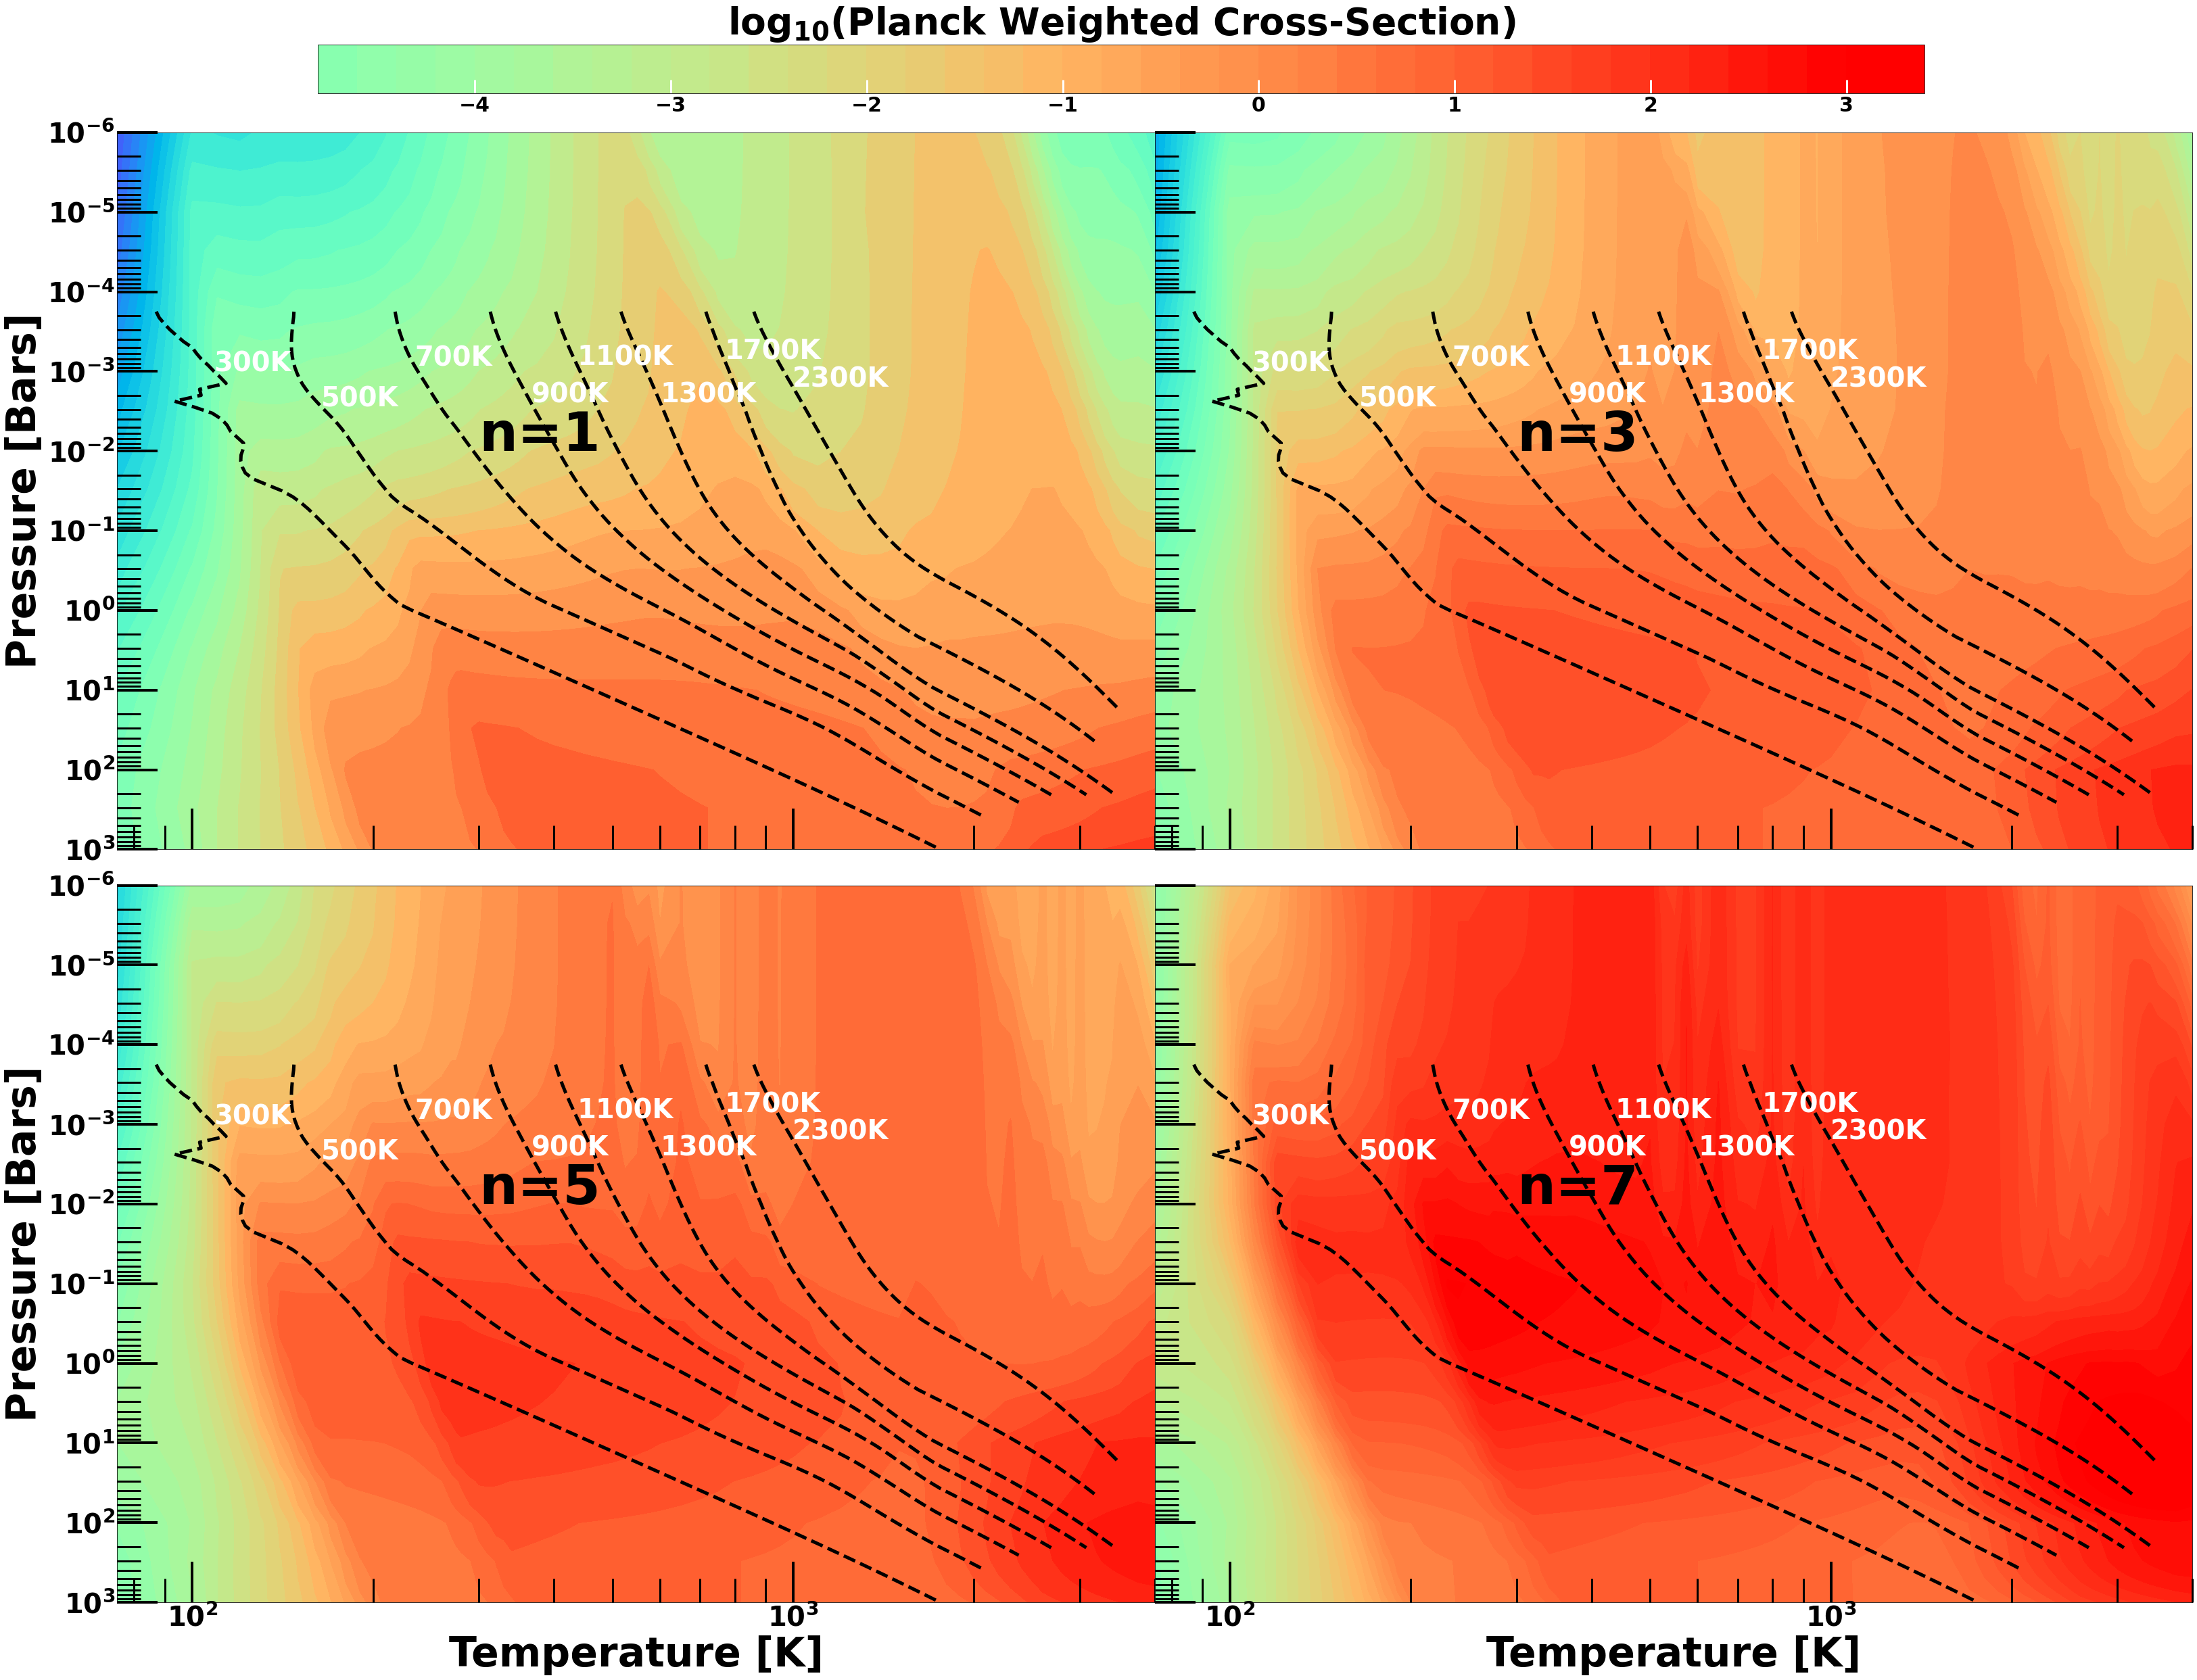

In [40]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(55,40))


im1=ax[0,0].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(cs_array[:,:,1]),40,aspect='auto',cmap='rainbow',vmin=-13,vmax=3,linewidths=30,linestyles='solid')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')

ax[0,0].set_ylim(1e3,1e-6)
ax[0,0].minorticks_on()
ax[0,0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0,0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)

ax[0,0].set_xticklabels([])

im1=ax[0,1].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(cs_array[:,:,3]),40,aspect='auto',cmap='rainbow',vmin=-13,vmax=3,linewidths=30,linestyles='solid')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')

ax[0,1].set_ylim(1e3,1e-6)
ax[0,1].minorticks_on()
ax[0,1].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0,1].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)

ax[0,1].set_xticklabels([])
ax[0,1].set_yticklabels([])


im1=ax[1,0].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(cs_array[:,:,5]),40,aspect='auto',cmap='rainbow',vmin=-13,vmax=3,linewidths=30,linestyles='solid')
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')

ax[1,0].set_ylim(1e3,1e-6)
ax[1,0].minorticks_on()
ax[1,0].tick_params(axis='y',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='y',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[1,0].tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,0].tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)


#ax[1,0].set_xticklabels([])
#ax[1,0].set_yticklabels([])

im1=ax[1,1].contourf(np.unique(opacity_ck.full_abunds['temperature']),(np.unique(opacity_ck.full_abunds['pressure'])),np.log10(cs_array[:,:,7]),40,aspect='auto',cmap='rainbow',vmin=-13,vmax=3,linewidths=30,linestyles='solid')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

ax[1,1].set_ylim(1e3,1e-6)
ax[1,1].minorticks_on()
ax[1,1].tick_params(axis='y',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,1].tick_params(axis='y',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[1,1].tick_params(axis='x',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1,1].tick_params(axis='x',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)


#ax[1,1].set_xticklabels([])
ax[1,1].set_yticklabels([])


ax[0,0].set_ylabel("Pressure [Bars]",fontsize=60)
ax[1,0].set_ylabel("Pressure [Bars]",fontsize=60)

ax[1,0].set_xlabel("Temperature [K]",fontsize=60)
ax[1,1].set_xlabel("Temperature [K]",fontsize=60)

ax[0,0].annotate("n=1",(300,1e-2),fontsize=80)
ax[0,1].annotate("n=3",(300,1e-2),fontsize=80)
ax[1,0].annotate("n=5",(300,1e-2),fontsize=80)
ax[1,1].annotate("n=7",(300,1e-2),fontsize=80)

for itemp in range(len(T_son)):
    pson,tson = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+T_son[itemp]+"g1000nc_m0.0.dat",usecols=[1,2],unpack=True,skiprows=1)
    ax[0,0].plot(tson,pson,linewidth=5,linestyle="--",color="k")
    ax[0,1].plot(tson,pson,linewidth=5,linestyle="--",color="k")
    ax[1,0].plot(tson,pson,linewidth=5,linestyle="--",color="k")
    ax[1,1].plot(tson,pson,linewidth=5,linestyle="--",color="k")
    
    
    ax[0,0].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    ax[0,1].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    ax[1,0].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    ax[1,1].annotate(T_son[itemp]+"K",(tson[ict],pson[ict]),fontsize=40,color="w")
    
    if itemp%2 == 0:
        ict+=7
    else:
        ict-=7

cbar_ax = fig.add_axes([0.2, 0.9, 0.6, 0.025])
fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r"log$_{10}$(Planck Weighted Cross-Section)",fontsize=55,labelpad=15)
#ax['E'].xaxis.set_label_position('top') 
cbar_ax.tick_params(axis='both',which='major',color="white",length =20, width=3,direction='in',labelsize=30)
cbar_ax.xaxis.set_label_position('top')

fig.subplots_adjust(wspace=0,hspace=0.05)

plt.savefig("Benchmarking/1460opacity_grid_new.pdf",bbox_inches="tight")


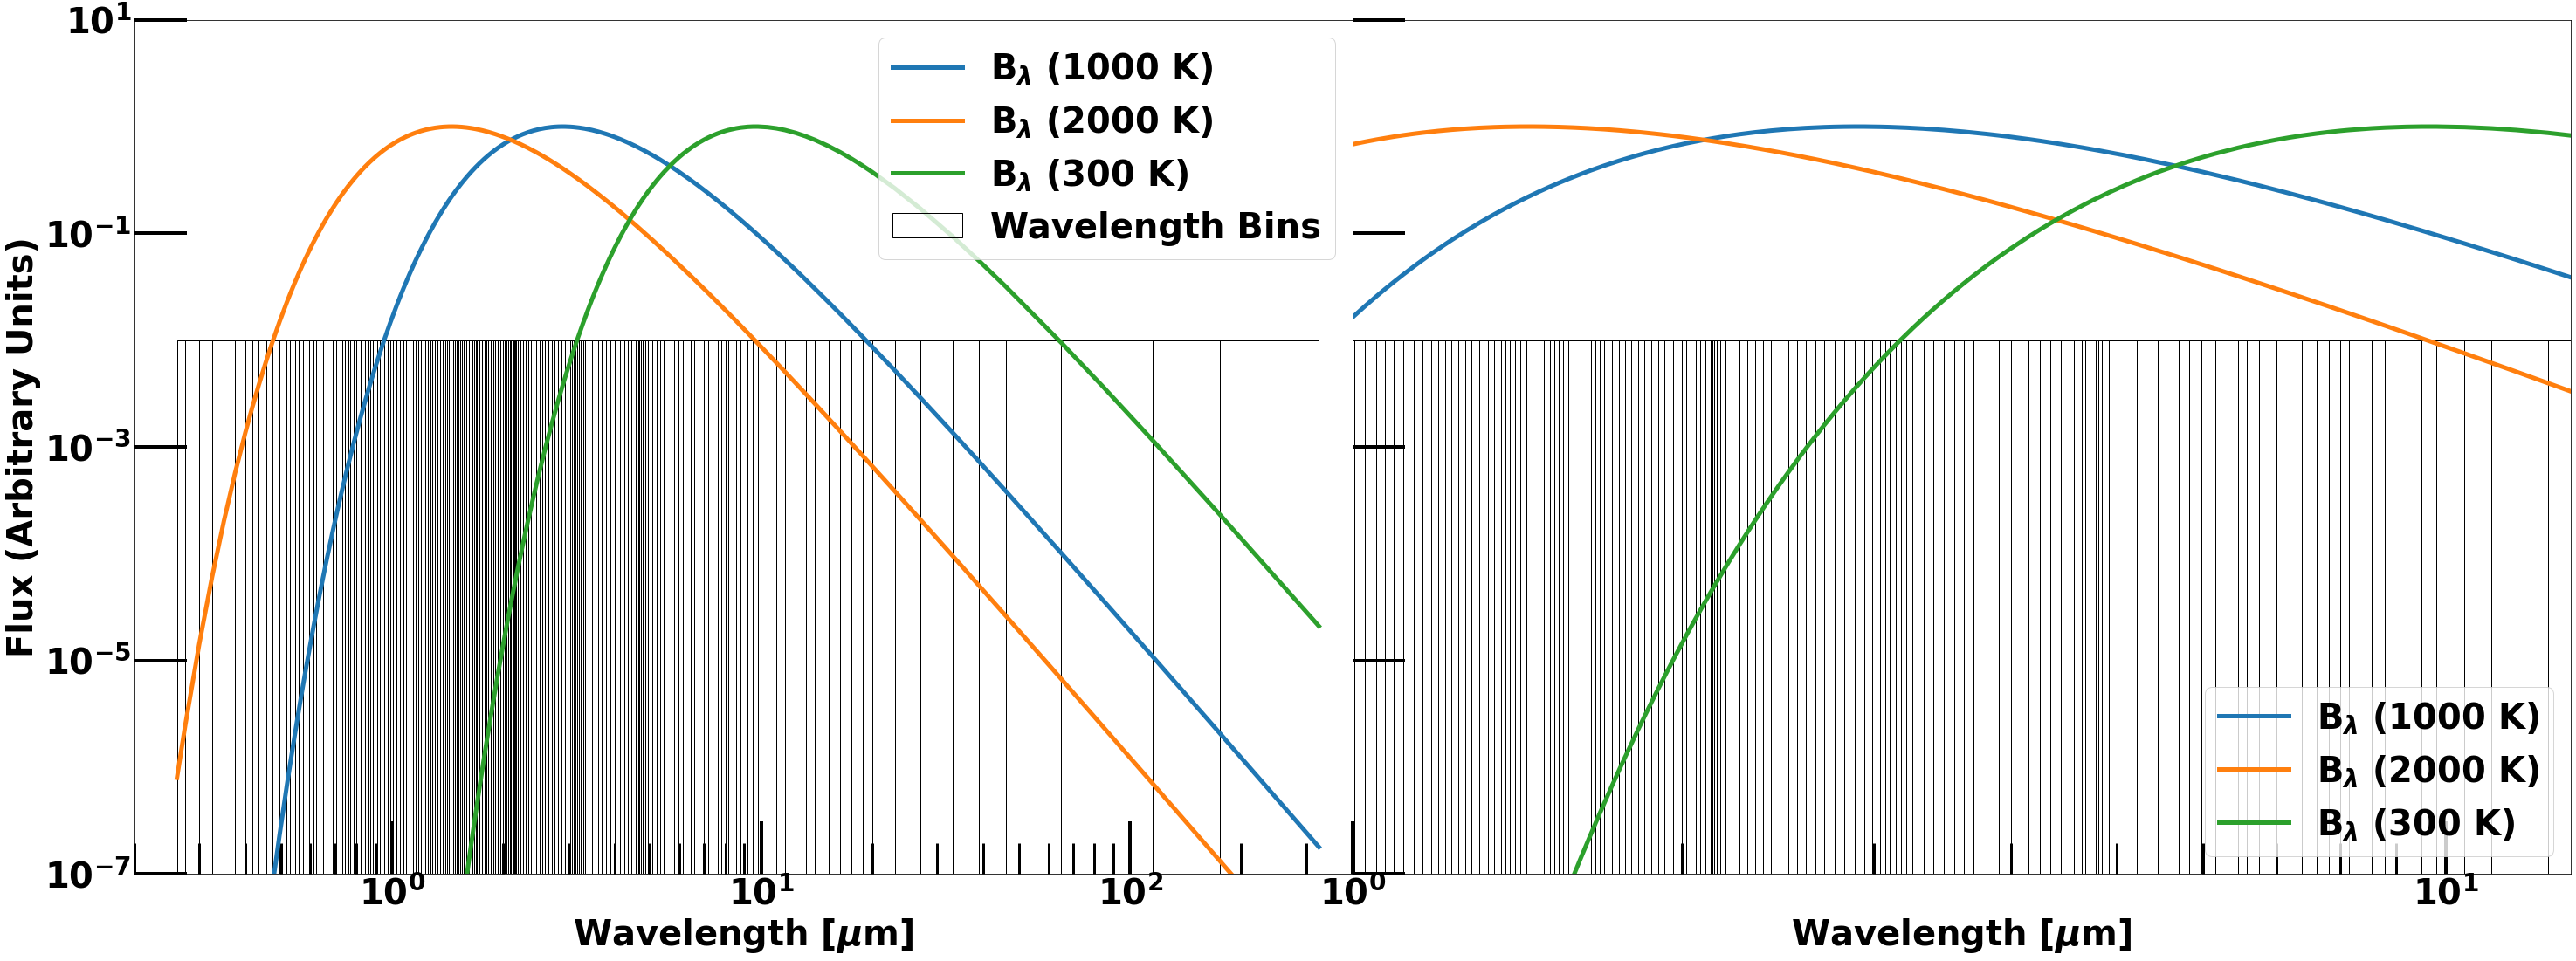

In [32]:
import matplotlib.patches as patches
wedge1,wedge2 = np.loadtxt("../EGP/run/input_files/INTERVALS.IR",usecols=[0,1],unpack=True)



lam1 =1e4/wedge1
lam2 = 1e4/wedge2

fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(50,18))

ax[0].set_ylim(1e-7,10)
ax[0].set_xlim(0.2,400)
ax[1].set_ylim(1e-7,10)
ax[1].set_xlim(1,13)
ax[0].loglog(lam1,b_lambda(1000,lam1)/np.max(b_lambda(1000,lam1)),linewidth=5,label=r"B$_{\lambda}$ (1000 K)")
ax[1].loglog(lam1,b_lambda(1000,lam1)/np.max(b_lambda(1000,lam1)),linewidth=5,label=r"B$_{\lambda}$ (1000 K)")

ax[0].loglog(lam1,b_lambda(2000,lam1)/np.max(b_lambda(2000,lam1)),linewidth=5,label=r"B$_{\lambda}$ (2000 K)")
ax[1].loglog(lam1,b_lambda(2000,lam1)/np.max(b_lambda(2000,lam1)),linewidth=5,label=r"B$_{\lambda}$ (2000 K)")

ax[0].loglog(lam1,b_lambda(300,lam1)/np.max(b_lambda(300,lam1)),linewidth=5,label=r"B$_{\lambda}$ (300 K)")
ax[1].loglog(lam1,b_lambda(300,lam1)/np.max(b_lambda(300,lam1)),linewidth=5,label=r"B$_{\lambda}$ (300 K)")

for i in range(len(lam1)):
    if i ==0 :
        rect = patches.Rectangle((lam2[i],0), lam1[i]-lam2[i], 0.01, linewidth=1, edgecolor='k', facecolor='none',label="Wavelength Bins")
        ax[0].add_patch(rect)
        
    rect = patches.Rectangle((lam2[i],0), lam1[i]-lam2[i], 0.01, linewidth=1, edgecolor='k', facecolor='none')
    ax[0].add_patch(rect)
    rect = patches.Rectangle((lam2[i],0), lam1[i]-lam2[i], 0.01, linewidth=1, edgecolor='k', facecolor='none')
    ax[1].add_patch(rect)

ax[0].minorticks_on()
ax[0].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[0].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)


ax[1].minorticks_on()
ax[1].tick_params(axis='both',which='major',color="k",length =60, width=4,direction='in',labelsize=40)
ax[1].tick_params(axis='both',which='minor',color="k",length =35, width=3,direction='in',labelsize=50)
ax[1].set_yticklabels([])

ax[0].legend(fontsize=40)
ax[1].legend(fontsize=40)

ax[0].set_ylabel("Flux (Arbitrary Units)",fontsize=40)
ax[1].set_xlabel(r"Wavelength [$\mu$m]",fontsize=40)
ax[0].set_xlabel(r"Wavelength [$\mu$m]",fontsize=40)

fig.subplots_adjust(wspace=0.0)
#plt.loglog(lam,np.exp(opacity_ck.kappa[3,28,:,0])*6.02214086e+23)
#plt.plot(lam,lam*0+aa)   

plt.savefig("Benchmarking/wv_bins.pdf",bbox_inches="tight")

In [33]:
t_table=np.loadtxt('reference/climate_INPUTS/tlog',usecols=[0],unpack=True)
p_table=np.loadtxt('reference/climate_INPUTS/plog',usecols=[0],unpack=True)

grad=np.zeros(shape=(53,26))
cp = np.zeros(shape=(53,26))

grad_inp, i_inp, j_inp = np.loadtxt('reference/climate_INPUTS/GRAD_FOR_PY_Y28',usecols=[0,1,2],unpack=True)
for i in range(len(grad_inp)):
    grad[int(i_inp[i]-1),int(j_inp[i]-1)]=grad_inp[i]

In [34]:

print(10**p_table)

[1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02 1.58489319e+02 2.51188643e+02 3.98107171e+02
 6.30957344e+02 1.00000000e+03]


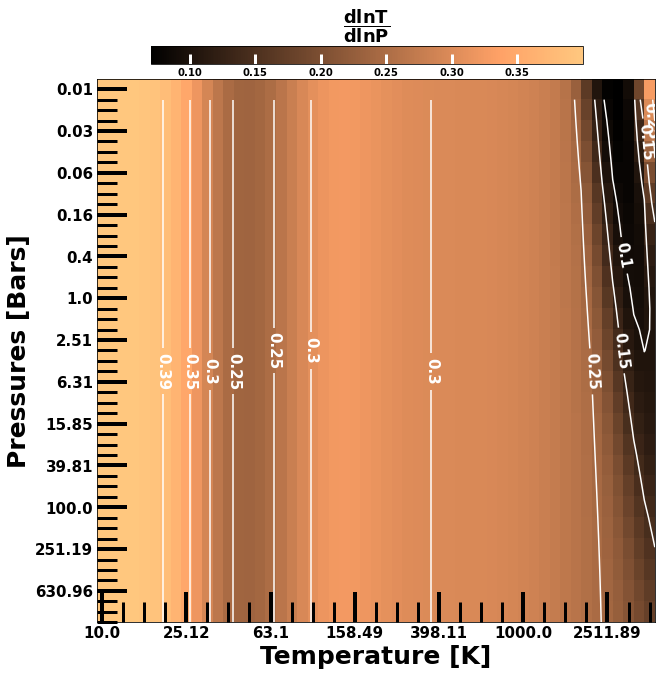

In [69]:
fig,ax = plt.subplots(figsize=(10,10))


im1=ax.imshow(np.transpose(grad),aspect='auto',cmap='copper')

x = 10**p_table # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 10 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x]# labels you want to see
x_labels=np.around(x_labels,decimals=2)

ax.set_yticks(ticks=x_positions)

ax.set_yticklabels(x_labels)


y = 10**t_table# the grid to which your data corresponds
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step_y = int(ny / (no_labels - 1)) # step between consecutive labels
y_positions = np.arange(0,ny,step_y) # pixel count at label position
y_labels = y[::step_y]# labels you want to see
#print(step_y)
y_labels=np.around(y_labels,decimals=2)
ax.set_xticks(y_positions)


def fmt(x):
    s = f"{x:.2f}"
    if s.endswith("0"):
        s = f"{x:.1f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"



ax.set_xticklabels(y_labels)
levels = [0.1,0.15,0.25,0.3,0.35,0.39]
cs = ax.contour(np.transpose(grad), levels=levels ,origin='lower', colors=['white'],linewidth=3)

ax.clabel(cs, cs.levels, inline=True,fmt=fmt, fontsize=15)
ax.minorticks_on()
ax.tick_params(axis='both',which='major',color="k",length =30, width=4,direction='in',labelsize=15)
ax.tick_params(axis='both',which='minor',color="k",length =20, width=3,direction='in',labelsize=10)

cbar_ax = fig.add_axes([0.2, 0.9, 0.6, 0.025])
fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r"${\dfrac{\rm dlnT}{\rm dlnP}}$",fontsize=18,labelpad=15)
#ax['E'].xaxis.set_label_position('top') 
cbar_ax.tick_params(axis='both',which='major',color="white",length =10, width=3,direction='in',labelsize=10)
cbar_ax.xaxis.set_label_position('top')

ax.set_ylabel("Pressures [Bars]",fontsize=25)
ax.set_xlabel("Temperature [K]",fontsize=25)

plt.savefig("Benchmarking/grad_convec.pdf",bbox_inches="tight")

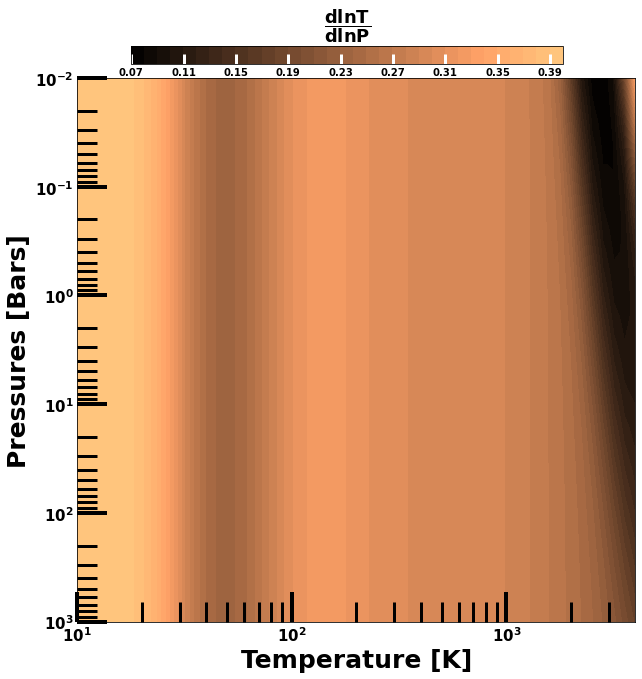

In [132]:
fig,ax = plt.subplots(figsize=(10,10))


im1=ax.contourf(10**t_table,10**p_table,np.transpose(grad),40,aspect='auto',cmap='copper')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e3,1e-2)

ax.minorticks_on()
ax.tick_params(axis='both',which='major',color="k",length =30, width=4,direction='in',labelsize=15)
ax.tick_params(axis='both',which='minor',color="k",length =20, width=3,direction='in',labelsize=10)


#for itemp in range(len(T_son)):
#    pson,tson = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+T_son[itemp]+"g1000nc_m0.0.dat",usecols=[1,2],unpack=True,skiprows=1)
#    ax.plot(tson,pson,linewidth=5,linestyle="--",color="k")
    
#    if itemp == 5:
#        ax.annotate(T_son[itemp]+"K",(tson[30],pson[30]),fontsize=25,color="w")
        
#    else:
#        ax.annotate(T_son[itemp]+"K",(tson[35],pson[35]),fontsize=25,color="w")
        


cbar_ax = fig.add_axes([0.2, 0.9, 0.6, 0.025])
fig.colorbar(im1, cax=cbar_ax,orientation='horizontal')
cbar_ax.set_xlabel(r"${\dfrac{\rm dlnT}{\rm dlnP}}$",fontsize=18,labelpad=15)
#ax['E'].xaxis.set_label_position('top') 
cbar_ax.tick_params(axis='both',which='major',color="white",length =10, width=3,direction='in',labelsize=10)
cbar_ax.xaxis.set_label_position('top')

ax.set_ylabel("Pressures [Bars]",fontsize=25)
ax.set_xlabel("Temperature [K]",fontsize=25)

plt.savefig("Benchmarking/grad_convec_new.pdf",bbox_inches="tight")